In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

41.31485623093775 153.91699972712837
68.23708057684894 63.37098992814302
-57.674449336773904 133.20419733923262
31.0844227918421 -136.3857363571044
-28.146792080599667 156.276247468811
85.59742901502358 115.36068441987254
89.54258930476496 -144.9554732075167
38.26083778605968 125.1678000339777
2.5187062514141445 2.3708329577191023
31.8200606334277 100.70063101974449
44.511696100582185 -173.2573284255923
-55.37933027322612 -171.9261926674987
82.74177137226272 132.7193861145716
81.79570103292417 -7.67780219032943
15.073222048503695 170.17473248408584
-26.316888572563485 -19.823340795112472
67.73383389542477 107.80392831455083
-17.614080414217213 -122.85097730505007
-29.001565239152946 15.817706312582516
-53.217638254348984 -153.13025277148037
-87.65996436454789 -45.47945306688558
61.20466043990794 17.009156357982533
40.31398757070505 130.67838473380516
10.405352195156965 161.1814288821933
-37.786783352295714 -24.176136961619306
78.81802628608344 153.0568189186023
7.176129821036213 -170.3

-46.04144246557414 -9.585173918673178
-45.56096882633441 21.82011023954834
85.01891546421524 -64.97919139232458
-47.05445091126603 14.441725534466627
-9.827735643657007 114.61527958532037
77.48224295859322 86.21280539713666
78.00445403309297 92.40695920018663
86.9406199335692 10.20265864639714
42.03994293150521 -96.95796206574141
23.594433857593003 -5.330801153670137
54.301549134461 44.2459386632481
-32.085062681564985 111.46235662696625
6.596114922040684 38.4192932088861
-60.15853984100434 78.31084510477183
89.42710748717994 81.02614788807591
22.19026356825239 47.12118473005211
-11.921659816515941 124.68096242679121
-71.05561614452952 -177.63025774556124
13.91138492709527 -0.35962095257872306
13.569268340180159 -3.4067111992307275
-72.07272823060012 -78.37124492711027
-89.9012052291878 -89.81088152604475
-3.9689386334564745 -85.22475904450337
42.26001318587697 21.038972219582945
34.891322466259155 86.62332006092532
4.8909490454356614 -20.36444511238787
79.27610280003358 94.70539663785

In [12]:
from citipy import citipy

In [13]:
# Create a list for holding cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If city is unique, then add to cities list
    if city not in cities:
        cities.append(city)
# Print city count to confirm sufficient count
len(cities)

601

In [14]:
# Import requests library
import requests

# Import api key
from config import weather_api_key

In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [24]:
# Create an empty list to hold weather data.
city_data = []
#Print begining of logging
print('Beginning Data Retrieval       ')
print("-------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create an endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record and set numbers and city.
    print(f" Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

len(cities)

Beginning Data Retrieval       
-------------------------------
 Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
 Processing Record 2 of Set 1 | komsomolskiy
 Processing Record 3 of Set 1 | new norfolk
 Processing Record 4 of Set 1 | half moon bay
 Processing Record 5 of Set 1 | byron bay
 Processing Record 6 of Set 1 | saskylakh
 Processing Record 7 of Set 1 | barrow
 Processing Record 8 of Set 1 | seoul
 Processing Record 9 of Set 1 | anloga
 Processing Record 10 of Set 1 | yaan
 Processing Record 11 of Set 1 | provideniya
 Processing Record 12 of Set 1 | vaini
 Processing Record 13 of Set 1 | tiksi
 Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
 Processing Record 15 of Set 1 | butaritari
 Processing Record 16 of Set 1 | jamestown
 Processing Record 17 of Set 1 | aykhal
 Processing Record 18 of Set 1 | rikitea
 Processing Record 19 of Set 1 | oranjemund
 Processing Record 20 of Set 1 | mataura
 Processing Record 21 of Set 1 | ush

 Processing Record 34 of Set 4 | tura
 Processing Record 35 of Set 4 | gari
 Processing Record 36 of Set 4 | riyadh
 Processing Record 37 of Set 4 | bengkulu
 Processing Record 38 of Set 4 | itarema
 Processing Record 39 of Set 4 | pangnirtung
 Processing Record 40 of Set 4 | lazaro cardenas
 Processing Record 41 of Set 4 | severo-kurilsk
 Processing Record 42 of Set 4 | nioro
 Processing Record 43 of Set 4 | louisbourg
City not found. Skipping...
 Processing Record 44 of Set 4 | samarai
 Processing Record 45 of Set 4 | fare
 Processing Record 46 of Set 4 | eydhafushi
 Processing Record 47 of Set 4 | tezu
 Processing Record 48 of Set 4 | buraydah
 Processing Record 49 of Set 4 | cache creek
 Processing Record 50 of Set 4 | talara
 Processing Record 1 of Set 5 | upernavik
 Processing Record 2 of Set 5 | yambio
 Processing Record 3 of Set 5 | ushtobe
 Processing Record 4 of Set 5 | lebu
 Processing Record 5 of Set 5 | tomatlan
 Processing Record 6 of Set 5 | arman
 Processing Record 7 of

 Processing Record 22 of Set 8 | mergui
City not found. Skipping...
 Processing Record 23 of Set 8 | lomza
 Processing Record 24 of Set 8 | husavik
 Processing Record 25 of Set 8 | parauna
 Processing Record 26 of Set 8 | devarkonda
 Processing Record 27 of Set 8 | namibe
 Processing Record 28 of Set 8 | bay roberts
 Processing Record 29 of Set 8 | solaro
 Processing Record 30 of Set 8 | floro
 Processing Record 31 of Set 8 | kintampo
 Processing Record 32 of Set 8 | sinegorye
 Processing Record 33 of Set 8 | barbacena
 Processing Record 34 of Set 8 | derveni
 Processing Record 35 of Set 8 | anadyr
 Processing Record 36 of Set 8 | bathsheba
 Processing Record 37 of Set 8 | lokomotivnyy
 Processing Record 38 of Set 8 | thompson
 Processing Record 39 of Set 8 | gorele
 Processing Record 40 of Set 8 | ranot
 Processing Record 41 of Set 8 | isla mujeres
 Processing Record 42 of Set 8 | upata
 Processing Record 43 of Set 8 | mrirt
City not found. Skipping...
 Processing Record 44 of Set 8 |

City not found. Skipping...
 Processing Record 2 of Set 12 | aksarka
 Processing Record 3 of Set 12 | charleville-mezieres
 Processing Record 4 of Set 12 | kushmurun
 Processing Record 5 of Set 12 | jiddah
City not found. Skipping...
 Processing Record 6 of Set 12 | necochea
 Processing Record 7 of Set 12 | marcona
City not found. Skipping...
 Processing Record 8 of Set 12 | bandarbeyla
 Processing Record 9 of Set 12 | darnah
 Processing Record 10 of Set 12 | haiger
 Processing Record 11 of Set 12 | mokhsogollokh
 Processing Record 12 of Set 12 | owando
 Processing Record 13 of Set 12 | alta floresta
 Processing Record 14 of Set 12 | logan
 Processing Record 15 of Set 12 | lewisburg
 Processing Record 16 of Set 12 | sarangani
 Processing Record 17 of Set 12 | norfolk
 Processing Record 18 of Set 12 | taoudenni
 Processing Record 19 of Set 12 | kadoshkino
 Processing Record 20 of Set 12 | wendo
 Processing Record 21 of Set 12 | souillac
 Processing Record 22 of Set 12 | kupang
 Processi

601

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
#city_data_df.head(10)

In [37]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Komsomolskiy,UZ,2022-07-12 20:29:30,40.4272,71.7189,77.72,44,75,13.80
1,New Norfolk,AU,2022-07-12 20:29:31,-42.7826,147.0587,42.30,83,90,1.01
2,Half Moon Bay,US,2022-07-12 20:29:31,37.4636,-122.4286,86.58,67,100,10.36
3,Byron Bay,AU,2022-07-12 20:28:13,-28.6500,153.6167,47.71,81,0,7.09
4,Saskylakh,RU,2022-07-12 20:29:34,71.9167,114.0833,39.58,82,100,9.91
5,Barrow,US,2022-07-12 20:29:34,71.2906,-156.7887,37.42,93,100,8.05
6,Seoul,KR,2022-07-12 20:29:34,37.5683,126.9778,78.37,94,100,4.61
7,Anloga,GH,2022-07-12 20:29:35,5.7947,0.8973,76.46,82,47,11.18
8,Yaan,NG,2022-07-12 20:29:36,7.3833,8.5667,73.62,93,53,6.96
9,Provideniya,RU,2022-07-12 20:29:39,64.3833,-173.3000,51.91,93,75,4.47


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

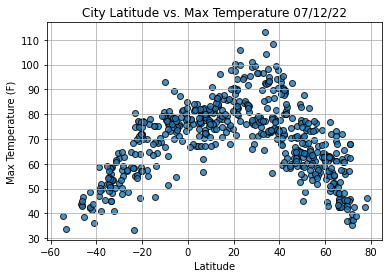

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

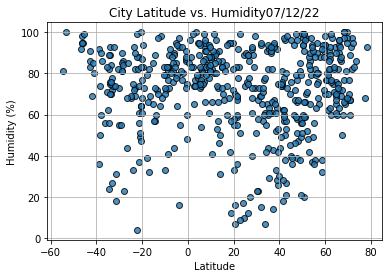

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

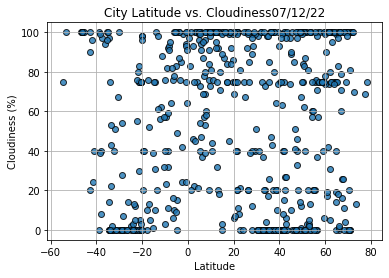

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

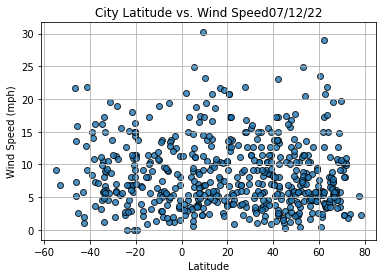

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()